### __BUSA3020 Group Assignment - Predicting Airbnb Listing Prices in Sydney__

--- 

**Due Date:** Friday, 3 June 2022 @ 11.59pm (Week 13)

**Overview:**   

- In the group assignment you will form a team of up to 3 students (minimum 2) and participate in a forecasting competition on Kaggle
- The goal is to predict listed property prices of Airbnb stays based on various Airbnb characteristics and regression models

- You will:  
    - Write a problem statement and perform Exploratory Data Analysis  
    - Clean up data, deal with categorical features and missing observations, and create new variables (feature engineering)  
    - Construct and tune forecasting models, produce forecasts and submit your predictions to Kaggle  
    - Each member of the team will record a video presentation of their work  
    - Marks will be awarded producing a prediction in the top 3 positions of their unit as well as for reaching the highest ranking on Kaggle amongst all teams.

**Instructions:** 

- Form a team of 3 students (minimum 2 students)  
- Each team member needs to join [https://www.kaggle.com](https://www.kaggle.com/)  
- Choose a team leader and form a team in the competition [https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19](https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19)
    - Team leader to click on `team` and join and invite other team members to join
    - There are two MQBS BUSA units competing in this competition
    - Your **team's name must start** with your unit code, for instance you could have a team called BUSA3020_PR3D1CT0RS
- All team members should work on all the tasks listed below however   
    - **Choose a team member who will be responsible for one of each of the 3 tasks listed below**    

**Marks**: 

- Total Marks: 40
- Your mark will consist of:  
    - 50% x overall assignment mark + 45% x mark for the task that you are responsible for + 5% x mark received from your teammates for your effort in group work 
- 7 marks will be deducted from each Task for which there is no video presentation 

**Competition Marks:**
- 5 marks: Ranking in the top 3 places of your unit on Kaggle (make sure you name your team as instructed above)
- 2 marks: Reaching the first place in your unit  (make sure you name your team as instructed above)


**Submissions:**  

1. On Kaggle: submit your team's forecast in order to be ranked by Kaggle
    - Can do this as many times as necessary while building their model  
2. On iLearn **only team leader to submit** this Jupyter notebook re-named `Group_Assignment_MQ_ID.ipynb` where MQ_ID is team leader's MQ ID number 
    - The Jupyter notebook must contain team members names/ID numbers, and team name in the competition
    - Provide answers to the 3 Tasks below in the allocated cells including all codes/outputs/writeups 
    - One 15 minute video recording of your work 
        - Each team member to provide a 5 minute presentation of the Task that they led (it is best to jointly record your video using Zoom)
        - When recording your video make sure your face is visible, that you share your Jupyter Notebook and explain everything you've done in the submitted Jupyter notebook on screen
        - 7 marks will be deducted from each Task for which there is no video presentation or if you don't follow the above instructions
        
3. On iLearn each student needs to submit a file with their teammates' names, SID and a mark for their group effort (out of 100%)



---

**Fill out the following information**

For each team member provide name, Student ID number and which task is performed below

- Team Name on Kaggle: `Real Airbnb`
- Team Leader and Team Member 1: `Hai Hoang Nguyen`
- Team Member 2: `Dang Thanh Hung Nguyen`
- Team Member 3: `Lan Anh Duong`

---

## Task 1: Problem Description and Initial Data Analysis

1. Read the Competition Overview on Kaggle [https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19](https://www.kaggle.com/t/caad5fd1f5134d86a15ab13d37d98d19)
2. Referring to Competition Overview and the data provided on Kaggle write about a 500 words **Problem Description** focusing on key points that will need to be addressed as first steps in Tasks 2 and 3 below, using the following headings:
    - Forecasting Problem
    - Evaluation Criteria
    - Types of Variables/Features
    - Data summary and main data characteristics
    - Missing Values (only explain what you found at this stage)
    
Total Marks: 11


**Forcasting Problem:**

**Evaluation Criteria:**

**Types of Variables/Features:**

In [1]:
#Task 1 code here, insert more cells if required
import pandas as pd 
import numpy as np

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')

#df_train.info()

In [2]:
#df_test.info()

**Data summary and main characteristics:**

**Missing values:**

In [3]:
#df_test.isnull().sum()

`(Task 1, Text Here - insert more cells as required)`

---

## Task 2: Data Cleaning, Missing Observations and Feature Engineering
- In this task you will follow a set of instructions/questions listed below.
- Make sure you **explain** each step you do both in Markdown text and on your video.
    - Do not just read out your commands without exaplaining what they do and why you used them 

Total Marks: 11

**Task 2, Question 1**: Clean **all** numerical features and the target variable `price` so that they can be used in training algorithms. For instance, `host_response_rate` feature is in object format containing both numerical values and text. Extract numerical values (or equivalently eliminate the text) so that the numerical values can be used as a regular feature.  
(2 marks)

Even though the descriptive statistics summary provided by the initial data analysis includes 34 features, we can identify 37 numerical features after having another look at the original datasets. 3 numerical variables must be in the wrong format and should be corrected for further analyis. 

**'host_response_rate'** and **'host_acceptance_rate'** are the two features which contain both numerical values and text on each entry, specfically number with percentage symbol (%). Since the intial data types of these two columns are string, we need to convert them to float after extracting the unwanted character. 

In [2]:
#examine the current data type
print(type(df_train['host_response_rate']))
print(type(df_train['host_acceptance_rate']))
print(type(df_test['host_response_rate']))
print(type(df_test['host_acceptance_rate']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [3]:
#remove unwanted character 
df_train['host_response_rate'] = df_train['host_response_rate'].str.replace('%', '')
df_train['host_acceptance_rate'] = df_train['host_acceptance_rate'].str.replace('%', '')
df_test['host_response_rate'] = df_test['host_response_rate'].str.replace('%', '')
df_test['host_acceptance_rate'] = df_test['host_acceptance_rate'].str.replace('%', '')

In [4]:
#change to float type 
df_train['host_response_rate'] = df_train['host_response_rate'].astype(float)
df_train['host_acceptance_rate'] = df_train['host_acceptance_rate'].astype(float)
df_test['host_response_rate'] = df_test['host_response_rate'].astype(float)
df_test['host_acceptance_rate'] = df_test['host_acceptance_rate'].astype(float)

Besides, **'price'** as the target variable of the training dataset is also not denoted as a floating point attribute due to the same pattern of having an unwanted character that is the dollar sign ($). By repeating the procedure, we can convert price to the accurate data type.

In [5]:
#examine the current data type
print(type(df_train['price']))

<class 'pandas.core.series.Series'>


In [6]:
max(df_train['price'], key=len)

'$2,746.00'

In [7]:
#remove unwanted character 
df_train['price'] = df_train['price'].str.replace('$', '')
df_train['price'] = df_train['price'].str.replace(',', '')

C:\Users\haiho\AppData\Local\Temp/ipykernel_41436/4044502110.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_train['price'] = df_train['price'].str.replace('$', '')


In [8]:
#change to float type 
df_train['price'] = df_train['price'].astype(float)

`(Task 2, Question 1 Text Here - insert more cells as required)`

**Task 2, Question 2** Create at least 4 new features from existing features which contain multiple items of information, e.g. creating `email`,  `phone`, `reviews`, `jumio`, etc. from feature `host_verifications`.  
(2 marks)

In [9]:
## Task 2, Question 2 Code Here
df_train['host_verifications'].head(10)

0    ['email', 'phone', 'reviews', 'jumio', 'offlin...
1    ['email', 'phone', 'facebook', 'reviews', 'jum...
2    ['email', 'phone', 'facebook', 'reviews', 'jum...
3    ['email', 'phone', 'facebook', 'reviews', 'jum...
4    ['email', 'phone', 'reviews', 'jumio', 'offlin...
5    ['email', 'phone', 'reviews', 'jumio', 'offlin...
6    ['email', 'phone', 'reviews', 'jumio', 'govern...
7    ['email', 'phone', 'facebook', 'reviews', 'off...
8          ['email', 'phone', 'reviews', 'work_email']
9                        ['email', 'phone', 'reviews']
Name: host_verifications, dtype: object

In [10]:
print(type(df_train['host_verifications']))
print(type(df_test['host_verifications']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [11]:
for i in ['email', 'phone', 'reviews', 'jumio']:
    count = 0
    for row in df_train.itertuples(index = True, name ='Pandas'):
        if i in getattr(row, 'host_verifications'):
            count+=1
    print('Value counts of',i,'verifications :',count)      

Value counts of email verifications : 6495
Value counts of phone verifications : 6995
Value counts of reviews verifications : 4429
Value counts of jumio verifications : 4795


Now we design 4 functions to create 4 new features based on the host verifications:

In [12]:
#for email verifications 
def email_veri(row):
    for i in range(len(row)):
        if 'email' in row['host_verifications']:
            return 1 
        else: 
            return 0

#for phone verifications 
def phone_veri(row):
    for i in range(len(row)):
        if 'phone' in row['host_verifications']:
            return 1 
        else: 
            return 0

#for reviews verifications 
def reviews_veri(row):
    for i in range(len(row)):
        if 'reviews' in row['host_verifications']:
            return 1 
        else: 
            return 0 

#for jumio verifications 
def jumio_veri(row):
    for i in range(len(row)):
        if 'jumio' in row['host_verifications']:
            return 1 
        else: 
            return 0

In [13]:
#apply to the training set
df_train['email'] = df_train.apply(email_veri, axis=1)
df_train['phone'] = df_train.apply(phone_veri, axis=1)
df_train['reviews'] = df_train.apply(reviews_veri, axis=1)
df_train['jumio'] = df_train.apply(jumio_veri, axis=1)

In [14]:
#apply to the test set
df_test['email'] = df_test.apply(email_veri, axis=1)
df_test['phone'] = df_test.apply(phone_veri, axis=1)
df_test['reviews'] = df_test.apply(reviews_veri, axis=1)
df_test['jumio'] = df_test.apply(jumio_veri, axis=1)

In [15]:
#drop the original column
df_train.drop(columns='host_verifications', inplace=True)
df_test.drop(columns='host_verifications', inplace=True)

We also identify that the **'amenities'** feature has multiple items of information which need to be separated.

In [16]:
longest_list = max(df_train['amenities'], key=len)
longest_list

'["Clothing storage: wardrobe, walk-in closet, and dresser", "Hot water", "Coffee maker", "Free dryer \\u2013 In building", "Toaster", "Heating", "Long term stays allowed", "Extra pillows and blankets", "Dining table", "Private fenced garden or backyard", "Bikes", "Hair dryer", "Conditioner", "Drying rack for clothing", "Babysitter recommendations", "Laundromat nearby", "Fire pit", "Bathtub", "Oven", "Private entrance", "Lockbox", "Beach essentials", "Dedicated workspace: monitor, desk, table, and office chair", "Bread maker", "Ceiling fan", "Microwave", "Iron", "Free washer \\u2013 In building", "68\\" HDTV with Amazon Prime Video, Apple TV, Netflix, standard cable", "Refrigerator", "Outdoor shower", "Board games", "Fire extinguisher", "Hot water kettle", "Piano", "Samsung Bar Bluetooth sound system", "Children\\u2019s dinnerware", "Stove", "Portable fans", "Ethernet connection", "Bed linens", "Game console", "Cable TV", "Hangers", "Pack \\u2019n play/Travel crib", "BBQ grill", "Body 

In [19]:
df_train.index[df_train['amenities']==longest_list].tolist()

[967]

In [152]:
for i in ["Clothing storage: wardrobe, walk-in closet, and dresser", "Hot water", "Coffee maker", "Free dryer \\u2013 In building", "Toaster", "Heating", "Long term stays allowed", "Extra pillows and blankets", "Dining table", "Private fenced garden or backyard", "Bikes", "Hair dryer", "Conditioner", "Drying rack for clothing", "Babysitter recommendations", "Laundromat nearby", "Fire pit", "Bathtub", "Oven", "Private entrance", "Lockbox", "Beach essentials", "Dedicated workspace: monitor, desk, table, and office chair", "Bread maker", "Ceiling fan", "Microwave", "Iron", "Free washer \\u2013 In building", "68\\ HDTV with Amazon Prime Video, Apple TV, Netflix, standard cable", "Refrigerator", "Outdoor shower", "Board games", "Fire extinguisher", "Hot water kettle", "Piano", "Samsung Bar Bluetooth sound system", "Children\\u2019s dinnerware", "Stove", "Portable fans", "Ethernet connection", "Bed linens", "Game console", "Cable TV", "Hangers", "Pack \\u2019n play/Travel crib", "BBQ grill", "Body soap", "First aid kit", "Smoke alarm", "Room-darkening shades", "Luggage dropoff allowed", "Private patio or balcony", "Essentials", "Cooking basics", "Barbecue utensils", "Baking sheet", "Outdoor furniture", "Outdoor dining area", "Private outdoor saltwater pool", "Wifi", "Free street parking", "Dishwasher", "Freezer", "Nespresso machine", "Dishes and silverware", "Wine glasses", "Cleaning products", "Free parking on premises", "Shampoo", "Shower gel", "Children\\u2019s books and toys", "Kitchen", "Baby safety gates", "High chair", "Rice maker", "Trash compactor", "Mosquito net"]:
    count = 0
    for row in df_train.itertuples(index = True, name ='Pandas'):
        if i in getattr(row, 'amenities'):
            count+=1
    print('Value counts of',i,'amenity :',count)   

Value counts of Clothing storage: wardrobe, walk-in closet, and dresser amenity : 3
Value counts of Hot water amenity : 5506
Value counts of Coffee maker amenity : 2713
Value counts of Free dryer \u2013 In building amenity : 44
Value counts of Toaster amenity : 1229
Value counts of Heating amenity : 5067
Value counts of Long term stays allowed amenity : 6387
Value counts of Extra pillows and blankets amenity : 2957
Value counts of Dining table amenity : 1148
Value counts of Private fenced garden or backyard amenity : 357
Value counts of Bikes amenity : 41
Value counts of Hair dryer amenity : 5697
Value counts of Conditioner amenity : 997
Value counts of Drying rack for clothing amenity : 855
Value counts of Babysitter recommendations amenity : 271
Value counts of Laundromat nearby amenity : 608
Value counts of Fire pit amenity : 140
Value counts of Bathtub amenity : 1285
Value counts of Oven amenity : 3640
Value counts of Private entrance amenity : 2912
Value counts of Lockbox amenity 

In general, the top 4 amenity to be recorded are: 'Long term stays allowed', 'Wifi', 'Essentials', 'Smoke alarm'

In [17]:
#for Long term stays allowed amenity 
def longterm_amenity(row):
    for i in range(len(row)):
        if 'Long term stays allowed' in row['amenities']:
            return 1 
        else: 
            return 0

#for Wifi amenity 
def wifi_amenity(row):
    for i in range(len(row)):
        if 'Wifi' in row['amenities']:
            return 1 
        else: 
            return 0

#for Essentials amenity 
def essentials_amenity(row):
    for i in range(len(row)):
        if 'Essentials' in row['amenities']:
            return 1 
        else: 
            return 0

#for Smoke alarm amenity 
def smokealarm_amenity(row):
    for i in range(len(row)):
        if 'Smoke alarm' in row['amenities']:
            return 1 
        else: 
            return 0

In [18]:
#apply to the test set
df_train['Long term stays allowed'] = df_train.apply(longterm_amenity, axis=1)
df_train['Wifi'] = df_train.apply(wifi_amenity, axis=1)
df_train['Essentials'] = df_train.apply(essentials_amenity, axis=1)
df_train['Smoke alarm'] = df_train.apply(smokealarm_amenity, axis=1)

In [19]:
#apply to the test set
df_test['Long term stays allowed'] = df_test.apply(longterm_amenity, axis=1)
df_test['Wifi'] = df_test.apply(wifi_amenity, axis=1)
df_test['Essentials'] = df_test.apply(essentials_amenity, axis=1)
df_test['Smoke alarm'] = df_test.apply(smokealarm_amenity, axis=1)

In [20]:
#drop the test column
df_train.drop(columns='amenities', inplace=True)
df_test.drop(columns='amenities', inplace=True)

`(Task 2, Question 2 Text Here - insert more cells as required)`

**Task 2, Question 3**: Impute missing values for all features in both training and test datasets.   
(2 marks)

***For training dataset:***

In [23]:
df_train.shape

(7000, 67)

In [240]:
## Task 2, Question 3 Code Here
df_train.isnull().sum()

ID                                                 0
name                                               1
description                                       65
neighborhood_overview                           1817
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                      2458
host_response_time                                 0
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                  0
host_neighbourhood                              2912
host_listings_count                                0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                   1816
neighbourhood_cleansed                           108
latitude                                      

As different variables have specific characteristics including range, type, etc; different values should be utilized to impute missing values for all columns. Generally, while we can fill all misisng text variables with **'unknown'** value, numerical variables' missing values can be imputed with their **mode** or **mean** based on their characteristics. 

First, we start the imputing process with text columns:

In [24]:
textcol = ['name', 'description', 'neighborhood_overview', 'host_about', 'neighbourhood_cleansed', 'license']

In [25]:
df_train[textcol] = df_train[textcol].fillna(value='unknonwn')

We then continue to deal with numerical features which are divided into 2 categories. Specifically, specific features can be imputed with their most frequent values (mode) while the remaining features are filled with their average values (mean) instead. 

In [21]:
modefillcol = ['host_location','host_response_time', 'property_type', 'room_type','bathrooms']

In [22]:
modes = df_train[modefillcol].mode()
df_train[modefillcol] = df_train[modefillcol].fillna(value=modes.iloc[0])

In [23]:
meanfillcol = ['host_response_rate','host_acceptance_rate','bedrooms','beds','minimum_minimum_nights','maximum_maximum_nights','availability_365','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']

In [24]:
means = df_train[meanfillcol].mean()
df_train[meanfillcol] = df_train[meanfillcol].fillna(value=means.iloc[0])

However, by investigating thoroughout the dataset, we recognize that various numberical features should be in the form of integers instead of floatin point numbers. Therefore, they will be converted to the correct form for analysis purposes.

In [25]:
df_train[['bedrooms','beds','availability_365','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']] = df_train[['bedrooms','beds','availability_365','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']].astype(int)

***For test dataset:***

In [32]:
df_test.shape

(3000, 66)

In [33]:
df_test.isnull().sum()

ID                                                 0
name                                               1
description                                       89
neighborhood_overview                           1240
host_name                                          0
host_since                                         0
host_location                                      2
host_about                                      1432
host_response_time                              2534
host_response_rate                              2534
host_acceptance_rate                            2285
host_is_superhost                                  0
host_neighbourhood                              1263
host_listings_count                                0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                   1240
neighbourhood_cleansed                            42
latitude                                      

We repeat the same process as for the training dataset so that misisng values of the test set can be appropriately imputed.

`(Task 2, Question 3 Text Here - insert more cells as required)`

In [31]:
df_test[textcol] = df_test[textcol].fillna(value='unknonwn')

In [26]:
test_modes = df_test[modefillcol].mode()
df_test[modefillcol] = df_test[modefillcol].fillna(value=test_modes.iloc[0])

In [27]:
test_means = df_test[meanfillcol].mean()
df_test[meanfillcol] = df_test[meanfillcol].fillna(value=test_means.iloc[0])

In [28]:
df_test[['bedrooms','beds','availability_365','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']] = df_test[['bedrooms','beds','availability_365','minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm']].astype(int)

**Task 2, Question 4**: Encode all categorical variables appropriately as discussed in class. 


Where a categorical feature contains more than 5 unique values, map the features into 5 most frequent values + 'other' and then encode appropriately. For instance, you could group then map `property_type` into 5 basic types + 'other': [entire rental unit, private room, entire room, entire towehouse, shared room, other] and then encode.  
(2 marks)

In [35]:
## Task 2, Question 4 Code Here
df_train['property_type'].value_counts()

Entire rental unit                     3066
Entire residential home                1164
Private room in residential home        680
Private room in rental unit             433
Entire guest suite                      262
Entire guesthouse                       217
Entire townhouse                        150
Room in boutique hotel                  123
Entire condominium (condo)              107
Entire serviced apartment                89
Private room in townhouse                84
Entire cottage                           62
Room in hotel                            59
Entire loft                              47
Private room in guest suite              39
Room in aparthotel                       38
Entire villa                             38
Private room in villa                    32
Entire bungalow                          30
Room in serviced apartment               27
Private room in guesthouse               27
Private room in condominium (condo)      22
Private room in hostel          

In [169]:
df_test['property_type'].value_counts()

Entire rental unit                     1222
Private room in rental unit             519
Entire residential home                 431
Private room in residential home        359
Private room in townhouse                62
Entire townhouse                         54
Entire guest suite                       43
Entire condominium (condo)               43
Shared room in rental unit               31
Entire guesthouse                        28
Private room in condominium (condo)      26
Shared room in residential home          17
Room in boutique hotel                   15
Entire villa                             15
Entire serviced apartment                14
Private room in villa                    11
Room in hotel                            10
Entire loft                               9
Shared room in hostel                     8
Private room in guest suite               8
Entire cottage                            8
Private room in bungalow                  6
Entire bungalow                 

Investigating the identified values of 'property_type' of both datasets, it is evident to group values which are relevant to 'Private room', 'Shared room' and 'Entire room'. However, as it is difficult to idenify which values can be grouped together for 'Entire townhouse' or 'Entire rental unit', we need to specify lists of possible values and apply ordinal encodings.

In [29]:
e_townhouse = ['Entire villa', 'Entire residential home','Entire guest suite','Entire guesthouse','Entire bungalow','Tiny house','Entire place','Entire vacation home','Dome house','Earth house','Casa particular']
e_rentalunit = ['Entire serviced apartment', 'Entire loft', 'Entire rental unit', 'Entire condominium (condo)', 'Entire cottage']

In [30]:
#apply to the training set
for i in range(len(df_train)):
    if 'Private room' in df_train['property_type'].loc[i]:
        df_train['property_type'].loc[i]= 'Private room'
    if 'Shared room' in df_train['property_type'].loc[i]:
        df_train['property_type'].loc[i]= 'Shared room'
    if 'Room in' in df_train['property_type'].loc[i]:
        df_train['property_type'].loc[i]= 'Entire room'
    if df_train['property_type'].loc[i] in e_townhouse:
        df_train['property_type'].loc[i]= 'Entire townhouse'
    if df_train['property_type'].loc[i] in e_rentalunit:
        df_train['property_type'].loc[i]= 'Entire rental unit'

C:\Users\haiho\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [31]:
#apply to the test set
for i in range(len(df_test)):
    if 'Private room' in df_test['property_type'].loc[i]:
        df_test['property_type'].loc[i]= 'Private room'
    if 'Shared room' in df_test['property_type'].loc[i]:
        df_test['property_type'].loc[i]= 'Shared room'
    if 'Room in' in df_test['property_type'].loc[i]:
        df_test['property_type'].loc[i]= 'Entire room'
    if df_test['property_type'].loc[i] in e_townhouse:
        df_test['property_type'].loc[i]= 'Entire townhouse'
    if df_test['property_type'].loc[i] in e_rentalunit:
        df_test['property_type'].loc[i]= 'Entire rental unit'

Now that 5 basic types of Airbnb property have been identified, the remaining values can be assigned as 'Other'.

In [32]:
for i in range(len(df_train)):
    if df_train['property_type'].loc[i] not in ['Private room', 'Shared room','Entire room', 'Entire townhouse','Entire rental unit']:
        df_train['property_type'].loc[i] = 'Other'

In [33]:
for i in range(len(df_test)):
    if df_test['property_type'].loc[i] not in ['Private room', 'Shared room','Entire room', 'Entire townhouse','Entire rental unit']:
        df_test['property_type'].loc[i] = 'Other'

In [41]:
df_train['property_type'].value_counts()

Entire rental unit    3371
Entire townhouse      1892
Private room          1391
Entire room            255
Shared room             50
Other                   41
Name: property_type, dtype: int64

In [42]:
df_test['property_type'].value_counts()

Entire rental unit    1296
Private room          1014
Entire townhouse       584
Shared room             64
Entire room             30
Other                   12
Name: property_type, dtype: int64

In [43]:
df_train['price'].groupby(df_train['property_type']).mean()

property_type
Entire rental unit    240.258974
Entire room           229.866667
Entire townhouse      473.339852
Other                 482.634146
Private room           80.474479
Shared room            47.100000
Name: price, dtype: float64

First, we divide all identified values of **'property_type'** into 5 main groups that are 'entire rental unit', 'private room', 'entire room', 'entire townhouse', 'shared room' and the remaining types as 'other' and replace them in the dataset.

In [34]:
#map integer value
property_mapping = {'Other':6, 'Entire townhouse':5, 'Entire rental unit':4, 'Entire room':3, 'Private room':2, 'Shared room':1}
df_train['map_property_type'] = df_train['property_type'].map(property_mapping)

In [35]:
#drop the original column after mapping 
df_train.drop(columns=['property_type'],inplace=True)

In [180]:
df_train['bathrooms'].value_counts()

1 bath               3614
2 baths              1065
1 shared bath         601
1 private bath        459
1.5 baths             326
3 baths               223
2.5 baths             222
1.5 shared baths      117
2 shared baths        113
3.5 baths              65
4 baths                58
3 shared baths         32
2.5 shared baths       19
0 shared baths         12
5 baths                11
4.5 baths              10
0 baths                10
3.5 shared baths        8
Shared half-bath        8
6 shared baths          5
Half-bath               5
4 shared baths          3
4.5 shared baths        3
7 shared baths          2
6 baths                 2
5.5 shared baths        2
5.5 baths               2
Private half-bath       1
6.5 baths               1
11 baths                1
Name: bathrooms, dtype: int64

In [183]:
df_test['bathrooms'].value_counts()

1 bath               1403
1 shared bath         450
2 baths               405
1 private bath        237
1.5 baths             122
3 baths               103
2.5 baths              82
2 shared baths         57
1.5 shared baths       52
3.5 baths              18
4 baths                17
2.5 shared baths       10
0 baths                 7
3 shared baths          7
4.5 baths               6
5 baths                 6
0 shared baths          5
Half-bath               3
5.5 baths               2
6 baths                 2
4 shared baths          2
3.5 shared baths        1
19 baths                1
Shared half-bath        1
Private half-bath       1
Name: bathrooms, dtype: int64

Besides, it is identified that **'bathrooms'** feature includes more than 5 unique values which indicates a suitable encoding should also be applied. Based on the counting results of all bathroom types, we can classify them as 5 main groups: one full bath (1 bath), one full private full bath (1 private bath), one full shared bath (1 shared bath), many full baths (many baths), many full shared baths (many shared baths) and the remaining type as other.

In [36]:
#replace values 
#1 full bath
one_bath = ['1.5 baths']
df_train['bathrooms'] = df_train['bathrooms'].replace(one_bath,'1 bath')
df_test['bathrooms'] = df_test['bathrooms'].replace(one_bath,'1 bath')
#1 full shared bath
sh_bath = ['1.5 shared baths']
df_train['bathrooms'] = df_train['bathrooms'].replace(sh_bath,'1 shared bath')
df_test['bathrooms'] = df_test['bathrooms'].replace(sh_bath,'1 shared bath')
#many full baths
many_baths = ['2 baths','3 baths','2.5 baths','3.5 baths','4 baths','6 baths','5.5 baths','6.5 baths','11 baths','19 baths']
df_train['bathrooms'] = df_train['bathrooms'].replace(many_baths,'Many baths')
df_test['bathrooms'] = df_test['bathrooms'].replace(many_baths,'Many baths')
#many full shared baths
many_sh_baths = ['2 shared baths','3 shared baths','2.5 shared baths','5 baths','4.5 baths','3.5 shared baths','6 shared baths','4 shared baths','4.5 shared baths','7 shared baths','5.5 shared baths']
df_train['bathrooms'] = df_train['bathrooms'].replace(many_sh_baths,'Many shared baths')
df_test['bathrooms'] = df_test['bathrooms'].replace(many_sh_baths,'Many shared baths')
#the remaining types
other = ['0 shared baths','0 baths','Shared half-bath','Half-bath','Private half-bath']
df_train['bathrooms'] = df_train['bathrooms'].replace(other,'Other')
df_test['bathrooms'] = df_test['bathrooms'].replace(other,'Other')

In [47]:
df_train['bathrooms'].value_counts()

1 bath               3940
Many baths           1639
1 shared bath         718
1 private bath        459
Many shared baths     208
Other                  36
Name: bathrooms, dtype: int64

In [48]:
df_test['bathrooms'].value_counts()

1 bath               1525
Many baths            630
1 shared bath         502
1 private bath        237
Many shared baths      89
Other                  17
Name: bathrooms, dtype: int64

In [37]:
#map integer value
bathrooms_mapping = {'Other':1, 'Many shared baths':2, 'Many baths':3, '1 shared bath':4, '1 private bath':5, '1 bath':6}
df_train['map_bathrooms'] = df_train['bathrooms'].map(bathrooms_mapping)
df_test['map_bathrooms'] = df_test['bathrooms'].map(bathrooms_mapping)

In [38]:
#drop the original column after mapping 
df_train.drop(columns=['bathrooms'],inplace=True)
df_test.drop(columns=['bathrooms'],inplace=True)

`(Task 2, Question 4 Text Here - insert more cells as required)`

**Task 2, Question 5**: Perform any other actions you think need to be done on the data before constructing predictive models, and clearly explain what you have done.   
(1 marks)

In [15]:
## Task 2, Question 5 Code Here

In [260]:
df_train['room_type'].value_counts()

Entire home/apt    5337
Private room       1511
Hotel room          103
Shared room          49
Name: room_type, dtype: int64

In [261]:
df_train['host_response_time'].value_counts()

within an hour        4552
within a few hours    1271
within a day           860
a few days or more     317
Name: host_response_time, dtype: int64

Even though **'room_type'** and **'host_response_time'** only has 4 unique values, this feature should also be in an appropriate ordering of the labels by applying the same mapping integer values process.

In [39]:
#map integer value
room_mapping = {'Shared room':1, 'Hotel room':2, 'Private room':3, 'Entire home/apt':4}
df_train['room_maptype'] = df_train['room_type'].map(room_mapping)
df_test['room_maptype'] = df_test['room_type'].map(room_mapping)

In [40]:
response_time_mapping = {'a few days or more':1, 'within a day':2, 'within a few hours':3, 'within an hour':4}
df_train['response_time'] = df_train['host_response_time'].map(response_time_mapping)
df_test['response_time'] = df_test['host_response_time'].map(response_time_mapping)

In [41]:
#drop the original column after mapping 
df_train.drop(columns=['room_type'],inplace=True)
df_test.drop(columns=['room_type'],inplace=True)

In [42]:
#drop the original column after mapping 
df_train.drop(columns=['host_response_time'],inplace=True)
df_test.drop(columns=['host_response_time'],inplace=True)

Realizing that all three variables **'host_neibourhood'**, **'neighbourhood'** and **'neighbourhood_cleansed'** relate to the location of each Airbnb, we will only use **'neighbourhood_cleansed'** for the analysis process due to its lowest number of missing values. Additionally, as **'first_review'** and **'last_review'** will not heavily contribute to predict the price, they are also removed.

In [266]:
#drop host_neighbourhood, neighbourhood, firt review, last review
df_train.drop(columns = ['ID','host_neighbourhood','neighbourhood','first_review','last_review','host_since'],inplace=True)

Moreover, by assessing the values of the remaining categorical features which are **'has_availability'**, **'host_is_superhost'**, **'host_has_profile_pic'**, **'host_identity_verified'** and **'instant_bookable'**, we recognize that they only have 2 values of 't' and 'f'. Therefore, we can encode these 2 values to 1 and 0 respectively.

In [206]:
df_train['has_availability'].value_counts()

t    6986
f      14
Name: has_availability, dtype: int64

In [207]:
df_train['host_is_superhost'].value_counts()

f    4901
t    2099
Name: host_is_superhost, dtype: int64

In [208]:
df_train['host_has_profile_pic'].value_counts()

t    6981
f      19
Name: host_has_profile_pic, dtype: int64

In [209]:
df_train['host_identity_verified'].value_counts()

t    6320
f     680
Name: host_identity_verified, dtype: int64

In [210]:
df_train['instant_bookable'].value_counts()

f    4575
t    2425
Name: instant_bookable, dtype: int64

In [43]:
#encode values
df_train['has_availability'].replace({'t': 1, 'f': 0}, inplace=True)
df_train['host_is_superhost'].replace({'t': 1, 'f': 0}, inplace=True)
df_train['host_has_profile_pic'].replace({'t': 1, 'f': 0}, inplace=True)
df_train['host_identity_verified'].replace({'t': 1, 'f': 0}, inplace=True)
df_train['instant_bookable'].replace({'t': 1, 'f': 0}, inplace=True)

In [49]:
#encode values
df_test['has_availability'].replace({'t': 1, 'f': 0}, inplace=True)
df_test['host_is_superhost'].replace({'t': 1, 'f': 0}, inplace=True)
df_test['host_has_profile_pic'].replace({'t': 1, 'f': 0}, inplace=True)
df_test['host_identity_verified'].replace({'t': 1, 'f': 0}, inplace=True)
df_test['instant_bookable'].replace({'t': 1, 'f': 0}, inplace=True)

Lastly, since regression models only perform on numerical data, string-based features should also be handle properly. We can consider these features as indicator variables, for example a new feature **'has_name'** is created to indicate whether an Airbnb's name is specified or not. This way can be applied to other indicator variables, such as **'description'**, **'neighborhood_overview'**, **'host_about'**, **'host_neighbourhood'**, **'neighbourhood_cleansed'** and **'license'**.

In [52]:
df_train.isnull().sum()

ID                                                 0
name                                               1
description                                       65
neighborhood_overview                           1817
host_name                                          0
host_since                                         0
host_location                                      0
host_about                                      2458
host_response_rate                                 0
host_acceptance_rate                               0
host_is_superhost                                  0
host_neighbourhood                              2912
host_listings_count                                0
host_has_profile_pic                               0
host_identity_verified                             0
neighbourhood                                   1816
neighbourhood_cleansed                           108
latitude                                           0
longitude                                     

In [50]:
#apply to the training set
df_train['has_name'] = 1
df_train.loc[pd.isnull(df_train['name']), 'has_name'] = 0 
df_train['has_description'] = 1
df_train.loc[pd.isnull(df_train['description']), 'has_description'] = 0
df_train['has_neighborhood_overview'] = 1
df_train.loc[pd.isnull(df_train['neighborhood_overview']), 'has_neighborhood_overview'] = 0
df_train['has_host_about'] = 1
df_train.loc[pd.isnull(df_train['host_about']), 'has_host_about'] = 0
df_train['has_host_neighbourhood'] = 1
df_train.loc[pd.isnull(df_train['host_neighbourhood']), 'has_host_neighbourhood'] = 0
df_train['has_neighbourhood'] = 1
df_train.loc[pd.isnull(df_train['neighbourhood_cleansed']), 'has_neighbourhood'] = 0
df_train['has_license'] = 1
df_train.loc[pd.isnull(df_train['license']), 'has_license'] = 0

In [55]:
#apply to the training set
df_test['has_name'] = 1
df_test.loc[pd.isnull(df_test['name']), 'has_name'] = 0 
df_test['has_description'] = 1
df_test.loc[pd.isnull(df_test['description']), 'has_description'] = 0
df_test['has_neighborhood_overview'] = 1
df_test.loc[pd.isnull(df_test['neighborhood_overview']), 'has_neighborhood_overview'] = 0
df_test['has_host_about'] = 1
df_test.loc[pd.isnull(df_test['host_about']), 'has_host_about'] = 0
df_test['has_host_neighbourhood'] = 1
df_test.loc[pd.isnull(df_test['host_neighbourhood']), 'has_host_neighbourhood'] = 0
df_test['has_neighbourhood'] = 1
df_test.loc[pd.isnull(df_test['neighbourhood_cleansed']), 'has_neighbourhood'] = 0
df_test['has_license'] = 1
df_test.loc[pd.isnull(df_test['license']), 'has_license'] = 0

`(Task 2, Question 5 Text Here - insert more cells as required)`

**Task 2, Question 6**: Perform exploratory data analysis to measure the relationship between the features and the target and write up your findings. 
(2 marks)

In [59]:
## Task 2, Question 6 Code Here

In [58]:
correlations = df_train.corr().unstack().sort_values(ascending=False) #build correlation matrix
correlations = pd.DataFrame(correlations).reset_index() #convert to dataframe
correlations.columns = ['col1', 'col2', 'correlation'] #label it
correlations.query("col1 == 'price' & col2 != 'price'") #filter by variable

,col1,col2,correlation
151,price,accommodates,0.597608
171,price,map_property_type,0.381652
205,price,room_maptype,0.263343
208,price,latitude,0.262959
209,price,longitude,0.262011
374,price,calculated_host_listings_count_entire_homes,0.134978
519,price,has_license,0.097562
524,price,review_scores_rating,0.096719
528,price,host_listings_count,0.095468
581,price,reviews,0.084221


#correlation summary

After cleaning all string-based, categorical and numerical data, we identify that various potential features will not be utilized for forecasting models and included in the subset of the training data. They can be listed as: **'host_since'**, **'neighbourhood'**, **'first_review'** and **'last_review'**

`(Task 2, Question 6 Text Here - insert more cells as required)`

--- 
## Task 3: Fit and tune a forecasting model/Submit predictions/Report score and ranking

Make sure you **clearly explain each step** you do, both in text and on the recoded video.

1. Build a machine learning (ML) regression model taking into account the outcomes of Tasks 1 & 2
2. Fit the model and tune hyperparameters via cross-validation: make sure you comment and explain each step clearly
3. Create predictions using the test dataset and submit your predictions on Kaggle's competition page
4. Provide Kaggle ranking and **score** (screenshot your best submission) and comment
5. Make sure your Python code works, so that a marker that can replicate your all of your results and obtain the same MSE from Kaggle

- Hint: to perform well you will need to iterate Task 3, building and tuning various models in order to find the best one.

Total Marks: 11

In [60]:
df_train.shape

(7000, 74)

In [61]:
df_train.head(2)

,ID,name,description,neighborhood_overview,host_name,host_since,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,price,email,phone,reviews,jumio,Long term stays allowed,Wifi,Essentials,Smoke alarm,map_property_type,map_bathrooms,room_maptype,response_time,has_name,has_description,has_neighborhood_overview,has_host_about,has_host_neighbourhood,has_neighbourhood,has_license
0,0,Manly Harbour House,"Beautifully renovated, spacious and quiet, our...",Balgowlah Heights is one of the most prestigio...,Heidi,2009-11-20,"Sydney, New South Wales, Australia",I am a Canadian who has made Australia her hom...,100.0,69.0,1,Balgowlah,2.0,1,1,"Balgowlah, New South Wales, Australia",Manly,-33.80084,151.26378,6,3,3,2,22,2,2,22,22,2,22,1,0,14,14,174,3,1,0,2016-01-02,2021-06-01,4.67,4.33,4.33,4.67,4.33,4.67,4.33,Exempt,0,2,2,0,0,0.04,470.0,1,1,1,1,0,1,1,1,5,3,4,3,1,1,1,1,1,1,1
1,1,Unique Designer Rooftop Apartment in City Loca...,Penthouse living at it best ... You will be st...,The location is really central and there is nu...,Morag,2009-12-03,"Sydney, New South Wales, Australia",I am originally Scottish but I have made Sydne...,100.0,100.0,0,Darlinghurst,3.0,1,1,"Darlinghurst, New South Wales, Australia",Sydney,-33.87964,151.21680,2,1,1,2,90,2,2,90,90,2,90,1,5,31,61,336,383,18,6,2012-02-23,2021-12-03,4.42,4.58,4.40,4.77,4.67,4.70,4.47,PID-STRA-24061-7,1,1,0,1,0,3.21,82.0,1,1,1,1,1,1,1,1,2,5,3,4,1,1,1,1,1,1,1


1. Multiple Linear Regression

In [116]:
#Task 3 code here
from sklearn.model_selection import train_test_split

X = df_train.drop(['ID','name','description','neighborhood_overview','host_name','host_since','host_location','host_about','host_neighbourhood','neighbourhood','neighbourhood_cleansed','first_review','last_review','license','price'],axis=1)
y = df_train['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((4900, 59), (2100, 59))

In [112]:
# Import preprocessing module
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
# Create instance for feature standardization 
stdsc = StandardScaler()

In [113]:
# Scale and transform the training and test sets
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [117]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)

y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}, test: {mean_squared_error(y_test, y_test_pred):.3f}')
print(f'R^2 train: {r2_score(y_train, y_train_pred):.3f}, test: {r2_score(y_test, y_test_pred):.3f}')

MSE train: 6022.857, test: 36248.427
R^2 train: 0.950, test: 0.646


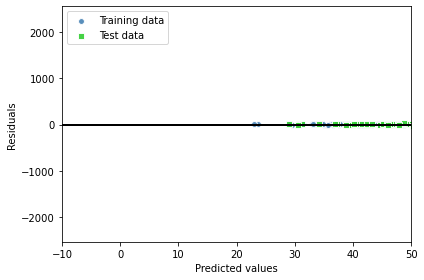

In [118]:
plt.scatter(y_train_pred, y_train_pred - y_train, c='steelblue', edgecolor='white', marker='o', s=35, alpha=0.9, label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c='limegreen', edgecolor='white', marker='s', s=35, alpha=0.9, label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

#plt.savefig('images/10_15.png', dpi=300)
plt.show()

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#no of features
nof_list=np.arange(1,59)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

In [114]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()

slr.fit(X_train_std, y_train)

y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)

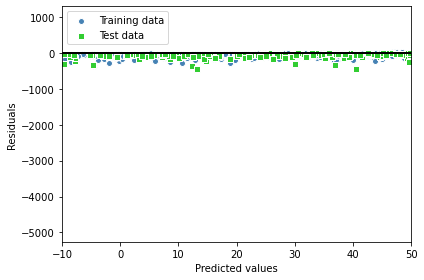

In [80]:
import matplotlib.pyplot as plt

plt.scatter(y_train_pred,  y_train_pred - y_train, c='steelblue', marker='o', edgecolor='white', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test, c='limegreen', marker='s', edgecolor='white', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

# plt.savefig('images/10_09.png', dpi=300)
plt.show()

In [115]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print(f'MSE train: {mean_squared_error(y_train, y_train_pred):.3f}, test: {mean_squared_error(y_test, y_test_pred):.3f}')
print(f'R^2 train: {r2_score(y_train, y_train_pred):.3f}, test: {r2_score(y_test, y_test_pred):.3f}')

MSE train: 60063.125, test: 52015.064
R^2 train: 0.500, test: 0.492


2. LASSO Regression

In [96]:
# the features in the house dataset are in very
# different scales, so it helps the regression to scale them
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [98]:
from sklearn.feature_selection import SelectFromModel
sel_ = SelectFromModel(Lasso(alpha=100))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=Lasso(alpha=100))

In [99]:
sel_.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [100]:
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 59
selected features: 1
features with coefficients shrank to zero: 58


In [82]:
from sklearn.linear_model import Lasso
    
lasso = Lasso(alpha=0.1) # alpha = lambda (above)

lasso.fit(X_train, y_train)

lasso_y_train_pred = lasso.predict(X_train)
lasso_y_test_pred = lasso.predict(X_test)

C:\Users\haiho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148335984.1891363, tolerance: 58839.56974977551
  model = cd_fast.enet_coordinate_descent(


In [83]:
print(f'LASSO MSE train: {mean_squared_error(y_train, lasso_y_train_pred):.3f}, test: {mean_squared_error(y_test, lasso_y_test_pred):.3f}')
print(f'LASSO R^2 train: {r2_score(y_train, lasso_y_train_pred):.3f}, test: {r2_score(y_test, lasso_y_test_pred):.3f}\n')

LASSO MSE train: 60146.875, test: 51988.188
LASSO R^2 train: 0.499, test: 0.492



3. Ridge Regression

In [85]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)

ridge.fit(X_train, y_train)

y_train_pred_ridge = ridge.predict(X_train)
y_test_pred_ridge = ridge.predict(X_test)

print(f'Ridge MSE train: {mean_squared_error(y_train, y_train_pred_ridge):.3f}, test: {mean_squared_error(y_test, y_test_pred_ridge):.3f}')
print(f'Ridge R^2 train: {r2_score(y_train, y_train_pred_ridge):.3f}, test: {r2_score(y_test, y_test_pred_ridge):.3f}\n')

Ridge MSE train: 60063.202, test: 52010.655
Ridge R^2 train: 0.500, test: 0.492



C:\Users\haiho\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.9757e-20): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


4. Elastic Net Regression

In [86]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.001, l1_ratio=0.5)

elasticnet.fit(X_train, y_train)
y_train_pred_elasticnet = elasticnet.predict(X_train)
y_test_pred_elasticnet = elasticnet.predict(X_test)

print(f'Elastic Net MSE train: {mean_squared_error(y_train, y_train_pred_elasticnet):.3f}, test: {mean_squared_error(y_test, y_test_pred_elasticnet):.3f}')
print(f'Elastic Net R^2 train: {r2_score(y_train, y_train_pred_elasticnet):.3f}, test: {r2_score(y_test, y_test_pred_elasticnet):.3f}\n')

Elastic Net MSE train: 60143.508, test: 52012.062
Elastic Net R^2 train: 0.499, test: 0.492



C:\Users\haiho\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 148102488.6898922, tolerance: 58839.56974977551
  model = cd_fast.enet_coordinate_descent(


In [90]:
X.shape

(7000, 59)

`(Task 3 - insert more cells as required)`